# Run Expectancy

## Context

In the previous sessions we compared player abilities using season-long averages. The capacity to reach bases *on average* is a reasonable measure of ability given the large number of appearances of the better players. However, an average of this kind is independent of context. To take an extreme example, On Base Percentage (OBP) gives as much credit to a walk when there are no runners on the bases as it does to a walk when bases are loaded, which produces an additional run. A lot of statistical analysis in baseball seeks to take account of the context of an event: a hit is more valuable in some circumstances than in others.


## Run Expectancy

Run expectancy is a very powerful framework for identifying certain aspects of performance. Specifically, run expectancy values the ability of batters to move runners around the bases taking into account (i) the state of the runners on base at any one point in time and (ii) the number of outs.

### An Example:

The example below shows the impact of a batter reaching first base in two different cases, (a) and (b). Suppose that in each case there is one out, but in case (a) there is a runner on second base while in case (b) there is a runner on third base. We want to compare the state of the game before and after the batter's hit.

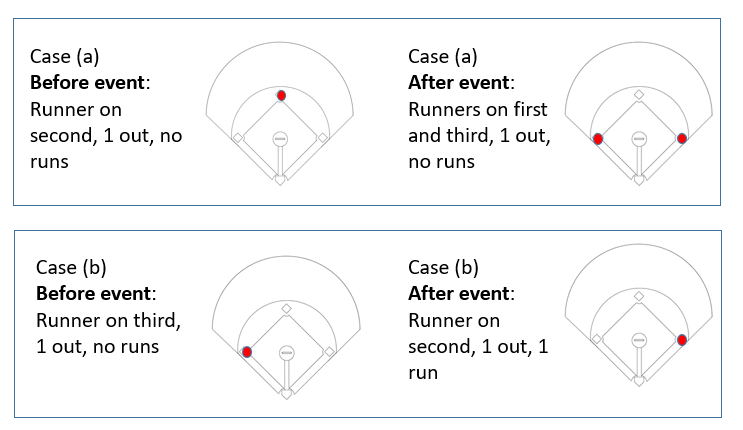

In case (a), the batter reaches first base and the runner on second advances to third base as a result of the hit. No runs are scored, but the run potential of the new state is high given two runners on base with one on third. In case (b) the batter reaches first base and the runner on third scores, adding one run to the total. Evaluating the contribution of the batter in this context is not always intuitive. While the scoring of the run is valuable, and the batter should get credit for advancing the runner, he wasn't responsible for getting the runner to third base in the first place. After the play, the run potential in case (b) is much lower because there is now no runner on third, in constrast to case (a). Thus while the overall value of the hit in case (b) might seem much greater (because a run was scored), the lower run expectancy of the bases after the event will make the difference in the value of the hit much smaller. 


## The Run Expectancy Matrix

Our goal is to place a value in terms of expected runs arising from a given event (out, single, double, etc). To do this we need to evaluate the run expectancy before and after the event - the value of the event is thus the change in run expectancy. We code each state by defining a matrix of possible states.

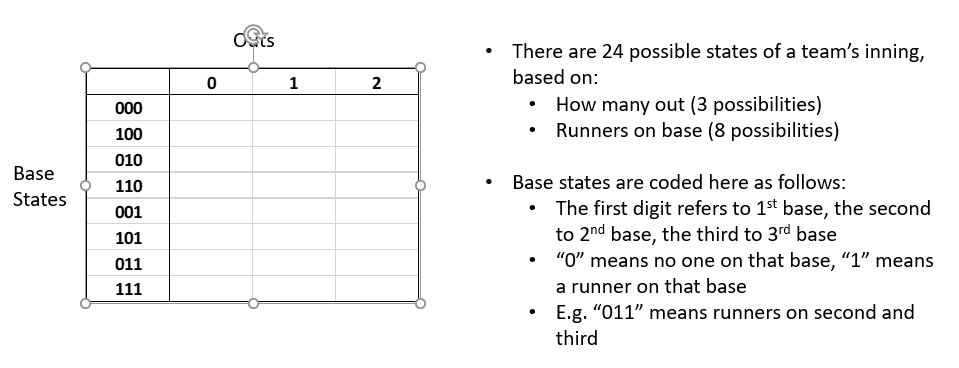

Thus the run expectancy matrix distinguishes 24 different states (contexts) for an event. We can refer to each possible state in terms of our code. Thus "000 2" means "no runners on base and two outs" or "101 1" means "a runner on first and third with one out". Instead of using a matrix, we can simply write down the possible states as a long list:

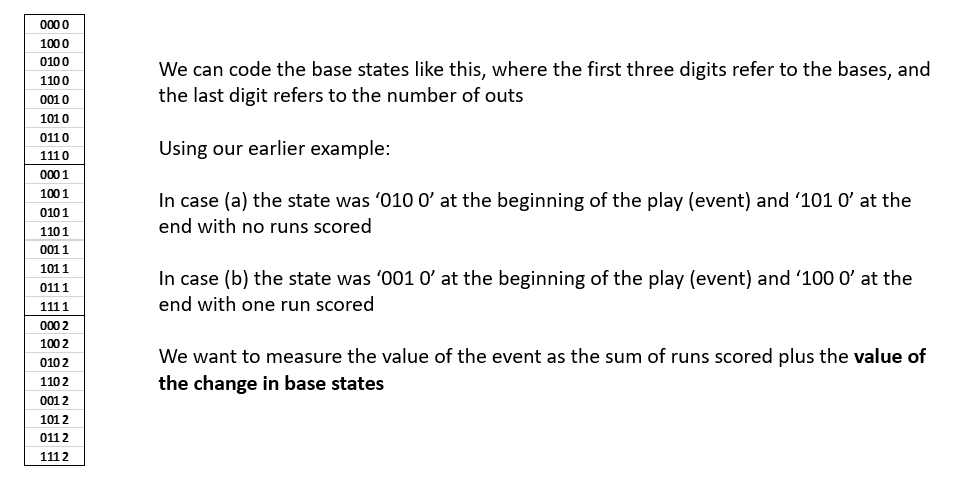

The run expectancy matrix is used to calculate the number of runs expected to be scored in a given state *until the end of the inning*.

In statistics, the concept of *expected value* refers to the value of all possible events weighted by the probability of that outcome. Furthermore, probabilities in statistics are usually identified with the frequency with which such events occur. Such probabilities are considered credible if they are calculated using a large numbers of observations. 

Run expectancy in a given state is calculated as the average of the number of runs scored from that state to the end of the inning, calculated from all events in a given season. In a Major League Baseball season there are typically around 200,000 events, which gives us some confidence in the reliability of the expected values.


## Run Value and Run Expectancy

There are many ways we can use the run expectancy matrix once we have calculated it. The most obvious is to value the contributions of the batters. Consider a particular at-bat. There is a run expectancy (RE) before the event and after the event, but there may also be runs scored as a result of the event. Thus, for that event we can credit the batter with a run value (RV):

**RV = Runs scored + RE (after at-bat) - RE (before at-bat)**

Note that RV may be both positive and negative. The contributions of a batter across a season can be calculated as the sum of the RVs of all their at-bats in a season.

# Coding Run Expectancy and MLBAM Data

It is possible to calculate the run expectancy matrix using Retrosheet data which goes back many years. However, the coding is somewhat involved (for an excellent description using R see Marchi and Albert (2013), Analyzing Baseball Data with R, chapter 5 - advanced coders can convert this to Python). In recent years, Major League Baseball Advanced Media (MLBAM) has published an event file each season which makes this calculation easy. 

We use this data below to generate the run expectancy matrix for the 2018 season.

In [1]:
#Load packages.
import pandas as pd
import numpy as np

In [2]:
# Read in MLBAM Data for 2018

MLBAM18 = pd.read_csv("../Data/MLBAM18.csv")

# Drop column with no relevant information
MLBAM18.drop(['Unnamed: 0'], axis=1, inplace=True)

pd.set_option('display.max_columns', 100)
display(MLBAM18)

,inning,batterId,pitcherId,event,x,y,ab_num,timestamp,stand,throws,runnerMovement,half,balls,strikes,endOuts,actionId,description,game_type,home_team,home_teamId,home_lg,away_team,away_teamId,away_lg,venueId,stadium,field_teamId,playerId.1B,playerId.2B,playerId.3B,playerId.C,playerId.CF,playerId.LF,playerId.RF,playerId.SS,batterPos,batterName,pitcherName,runsOnPlay,startOuts,runsInInning,runsITD,runsFuture,start1B,start2B,start3B,end1B,end2B,end3B,outsInInning,startCode,endCode,fielderId,gameId,isPA,isAB,isHit,isBIP,our.x,our.y,r,theta
0,1,664023,570632,Home Run,233.22,70.48,1,2018-03-29 16:43:11,L,R,[664023:::T:Home Run],top,0,0,0,NaN,Ian Happ homers (1) on a fly ball to right fie...,R,mia,146,NL,chn,112,NL,4169,Marlins Park,146,571506,516770,605119,595453,621446,518618,643265,500743,CF,"Happ, I",Urena,1,0,3,0,3,NaN,NaN,NaN,NaN,NaN,NaN,3,0,0,NaN,gid_2018_03_29_chnmlb_miamlb_1,True,True,True,False,270.081515,320.743636,419.309557,0.870937
1,1,592178,570632,Walk,NaN,NaN,2,2018-03-29 16:43:56,R,R,[592178::1B::Walk],top,4,2,0,NaN,Kris Bryant walks.,R,mia,146,NL,chn,112,NL,4169,Marlins Park,146,571506,516770,605119,595453,621446,518618,643265,500743,3B,Bryant,Urena,0,0,3,1,2,NaN,NaN,NaN,592178.0,NaN,NaN,3,0,1,NaN,gid_2018_03_29_chnmlb_miamlb_1,True,False,False,False,NaN,NaN,NaN,NaN
2,1,519203,570632,Hit By Pitch,NaN,NaN,3,2018-03-29 16:46:24,L,R,[592178:1B:2B::Hit By Pitch][519203::1B::Hit B...,top,1,2,0,NaN,Anthony Rizzo hit by pitch. Kris Bryant to ...,R,mia,146,NL,chn,112,NL,4169,Marlins Park,146,571506,516770,605119,595453,621446,518618,643265,500743,1B,Rizzo,Urena,0,0,3,1,2,592178.0,NaN,NaN,519203.0,592178.0,NaN,3,1,3,NaN,gid_2018_03_29_chnmlb_miamlb_1,True,False,False,False,NaN,NaN,NaN,NaN
3,1,575929,570632,Strikeout,NaN,NaN,4,2018-03-29 16:48:44,R,R,NaN,top,2,3,1,NaN,Willson Contreras strikes out swinging.,R,mia,146,NL,chn,112,NL,4169,Marlins Park,146,571506,516770,605119,595453,621446,518618,643265,500743,C,Contreras,Urena,0,0,3,1,2,519203.0,592178.0,NaN,519203.0,592178.0,NaN,3,3,3,NaN,gid_2018_03_29_chnmlb_miamlb_1,True,True,False,False,NaN,NaN,NaN,NaN
4,1,656941,570632,Groundout,148.05,164.76,5,2018-03-29 16:52:10,L,R,[519203:1B:2B::Groundout][592178:2B:3B::Ground...,top,2,2,2,NaN,"Kyle Schwarber grounds out, first baseman Just...",R,mia,146,NL,chn,112,NL,4169,Marlins Park,146,571506,516770,605119,595453,621446,518618,643265,500743,LF,Schwarber,Urena,0,1,3,1,2,519203.0,592178.0,NaN,NaN,519203.0,592178.0,3,3,6,571506.0,gid_2018_03_29_chnmlb_miamlb_1,True,True,False,True,57.525216,85.451775,103.010467,0.978292
5,1,608365,570632,Hit By Pitch,NaN,NaN,6,2018-03-29 16:54:56,R,R,[608365::1B::Hit By Pitch],top,1,1,2,NaN,Addison Russell hit by pitch.,R,mia,146,NL,chn,112,NL,4169,Marlins Park,146,571506,516770,605119,595453,621446,518618,643265,500743,SS,Russell,Urena,0,2,3,1,2,NaN,519203.0,592178.0,608365.0,519203.0,592178.0,3,6,7,NaN,gid_2018_03_29_chnmlb_miamlb_1,True,False,False,False,NaN,NaN,NaN,NaN
6,1,518792,570632,Walk,NaN,NaN,7,2018-03-29 16:56:54,L,R,[608365:1B:2B::Walk][519203:2B:3B::Walk][59217...,top,4,0,2,NaN,Jason Heyward walks. Kris Bryant scores. ...,R,mia,146,NL,chn,112,NL,4169,Marlins Park,146,571506,516770,605119,595453,621446,518618,643265,500743,RF,Heyward,Urena,1,2,3,1,2,608365.0,519203.0,592178.0,518792.0,608365.0,519203.0,3,7,7,NaN,gid_2018_03_29_chnmlb_miamlb_1,True,False,False,False,NaN,NaN,NaN,NaN
7,1,595879,570632,Hit By Pitch,NaN,NaN,8,2018-03-29 16:59:56,R,R,[518792:1B:2B::Hit By Pitch][608365:2B:3B::Hit...,top,0,0,2,NaN,Javier Baez hit by pitch. Anthony Rizzo sco...,R,mia,146,NL,chn,112,NL,4169,Marlins Park,146,571506,516770,605119,595453,621446,518618,643265,500743,2B,"Baez, J",Urena,1,2,3,2,1,518792.0,608365.0,519203.0,595879.0,518792.0,608365.0,3,7,7,NaN,gid_2018_03_29_chnmlb_miamlb_1,True,False,False,False,NaN,NaN,NaN,NaN
8,1,452657,570632,Groundout,143.81,152.04,9,2018-03-29 17:01:12,L,R,[595879:1B:::Groundout][518792:2B:::Groundout]...,top,2,2,3,NaN,"Jon Lester grounds out, second baseman Star

In [3]:
# If we print a list of column headers we can see that the file contains a lot of variables (62 in fact).
# many of which we will not need to calculate the run expectancy matrix.

print(MLBAM18.columns.tolist())

['inning', 'batterId', 'pitcherId', 'event', 'x', 'y', 'ab_num', 'timestamp', 'stand', 'throws', 'runnerMovement', 'half', 'balls', 'strikes', 'endOuts', 'actionId', 'description', 'game_type', 'home_team', 'home_teamId', 'home_lg', 'away_team', 'away_teamId', 'away_lg', 'venueId', 'stadium', 'field_teamId', 'playerId.1B', 'playerId.2B', 'playerId.3B', 'playerId.C', 'playerId.CF', 'playerId.LF', 'playerId.RF', 'playerId.SS', 'batterPos', 'batterName', 'pitcherName', 'runsOnPlay', 'startOuts', 'runsInInning', 'runsITD', 'runsFuture', 'start1B', 'start2B', 'start3B', 'end1B', 'end2B', 'end3B', 'outsInInning', 'startCode', 'endCode', 'fielderId', 'gameId', 'isPA', 'isAB', 'isHit', 'isBIP', 'our.x', 'our.y', 'r', 'theta']


In [4]:
# Here we create a df RE18 which includes only columns we need to calculate the run expectancy matrix.

RE18 = MLBAM18[['batterName','batterId','event', 'start1B', 'start2B', 'start3B', 'end1B', 'end2B', 'end3B',\
                   'startOuts','endOuts','runsFuture','runsOnPlay','outsInInning',\
                   'stand', 'throws','venueId', 'stadium', 'batterPos']].copy()

display(RE18)                   

,batterName,batterId,event,start1B,start2B,start3B,end1B,end2B,end3B,startOuts,endOuts,runsFuture,runsOnPlay,outsInInning,stand,throws,venueId,stadium,batterPos
0,"Happ, I",664023,Home Run,NaN,NaN,NaN,NaN,NaN,NaN,0,0,3,1,3,L,R,4169,Marlins Park,CF
1,Bryant,592178,Walk,NaN,NaN,NaN,592178.0,NaN,NaN,0,0,2,0,3,R,R,4169,Marlins Park,3B
2,Rizzo,519203,Hit By Pitch,592178.0,NaN,NaN,519203.0,592178.0,NaN,0,0,2,0,3,L,R,4169,Marlins Park,1B
3,Contreras,575929,Strikeout,519203.0,592178.0,NaN,519203.0,592178.0,NaN,0,1,2,0,3,R,R,4169,Marlins Park,C
4,Schwarber,656941,Groundout,519203.0,592178.0,NaN,NaN,519203.0,592178.0,1,2,2,0,3,L,R,4169,Marlins Park,LF
5,Russell,608365,Hit By Pitch,NaN,519203.0,592178.0,608365.0,519203.0,592178.0,2,2,2,0,3,R,R,4169,Marlins Park,SS
6,Heyward,518792,Walk,608365.0,519203.0,592178.0,518792.0,608365.0,519203.0,2,2,2,1,3,L,R,4169,Marlins Park,RF
7,"Baez, J",595879,Hit By Pitch,518792.0,608365.0,519203.0,595879.0,518792.0,608365.0,2,2,1,1,3,R,R,4169,Marlins Park,2B
8,Lester,452657,Groundout,595879.0,518792.0,608365.0,NaN,NaN,NaN,2,3,0,0,3,L,R,4169,Marlins Park,P
9,Brinson,621446,Groundout,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,0,3,R,L,4169,Marlins Park,CF


In [5]:
# Each player in the database has a unique numerical code. The columns 'Start1','Start2' and'Start3' provide the code of 
# the player on first, second and third base at the start of the event (play). If there is no one on that base it is recorded 
# as a missing value (NaN). To calculate RE we only need to know if their was a player on base or not, and so we simply
# code the state of each base as 1 (player on base) or 0 (no player on base)

RE18['Start1'] = np.where(pd.isnull(RE18['start1B']),0,1)
RE18['Start2'] = np.where(pd.isnull(RE18['start2B']),0,1)
RE18['Start3'] = np.where(pd.isnull(RE18['start3B']),0,1)
RE18

,batterName,batterId,event,start1B,start2B,start3B,end1B,end2B,end3B,startOuts,endOuts,runsFuture,runsOnPlay,outsInInning,stand,throws,venueId,stadium,batterPos,Start1,Start2,Start3
0,"Happ, I",664023,Home Run,NaN,NaN,NaN,NaN,NaN,NaN,0,0,3,1,3,L,R,4169,Marlins Park,CF,0,0,0
1,Bryant,592178,Walk,NaN,NaN,NaN,592178.0,NaN,NaN,0,0,2,0,3,R,R,4169,Marlins Park,3B,0,0,0
2,Rizzo,519203,Hit By Pitch,592178.0,NaN,NaN,519203.0,592178.0,NaN,0,0,2,0,3,L,R,4169,Marlins Park,1B,1,0,0
3,Contreras,575929,Strikeout,519203.0,592178.0,NaN,519203.0,592178.0,NaN,0,1,2,0,3,R,R,4169,Marlins Park,C,1,1,0
4,Schwarber,656941,Groundout,519203.0,592178.0,NaN,NaN,519203.0,592178.0,1,2,2,0,3,L,R,4169,Marlins Park,LF,1,1,0
5,Russell,608365,Hit By Pitch,NaN,519203.0,592178.0,608365.0,519203.0,592178.0,2,2,2,0,3,R,R,4169,Marlins Park,SS,0,1,1
6,Heyward,518792,Walk,608365.0,519203.0,592178.0,518792.0,608365.0,519203.0,2,2,2,1,3,L,R,4169,Marlins Park,RF,1,1,1
7,"Baez, J",595879,Hit By Pitch,518792.0,608365.0,519203.0,595879.0,518792.0,608365.0,2,2,1,1,3,R,R,4169,Marlins Park,2B,1,1,1
8,Lester,452657,Groundout,595879.0,518792.0,608365.0,NaN,NaN,NaN,2,3,0,0,3,L,R,4169,Marlins Park,P,1,1,1
9,Brinson,621446,Groundout,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,0,3,R,L,4169,Marlins Park,CF,0,0,0


In [6]:
# We can now create the 24 possible states (at the start of the event) by combining the base states with the number of outs
# (startOuts). Note that we must tell Python to treat the base states as strings, since otherwise Python would treat the numbers as
# integers.

RE18['Start_State'] = (RE18['Start1'].astype(str) + RE18['Start2'].astype(str) + RE18['Start3'].astype(str)+\
                          " " + RE18['startOuts'].astype(str))

RE18

,batterName,batterId,event,start1B,start2B,start3B,end1B,end2B,end3B,startOuts,endOuts,runsFuture,runsOnPlay,outsInInning,stand,throws,venueId,stadium,batterPos,Start1,Start2,Start3,Start_State
0,"Happ, I",664023,Home Run,NaN,NaN,NaN,NaN,NaN,NaN,0,0,3,1,3,L,R,4169,Marlins Park,CF,0,0,0,000 0
1,Bryant,592178,Walk,NaN,NaN,NaN,592178.0,NaN,NaN,0,0,2,0,3,R,R,4169,Marlins Park,3B,0,0,0,000 0
2,Rizzo,519203,Hit By Pitch,592178.0,NaN,NaN,519203.0,592178.0,NaN,0,0,2,0,3,L,R,4169,Marlins Park,1B,1,0,0,100 0
3,Contreras,575929,Strikeout,519203.0,592178.0,NaN,519203.0,592178.0,NaN,0,1,2,0,3,R,R,4169,Marlins Park,C,1,1,0,110 0
4,Schwarber,656941,Groundout,519203.0,592178.0,NaN,NaN,519203.0,592178.0,1,2,2,0,3,L,R,4169,Marlins Park,LF,1,1,0,110 1
5,Russell,608365,Hit By Pitch,NaN,519203.0,592178.0,608365.0,519203.0,592178.0,2,2,2,0,3,R,R,4169,Marlins Park,SS,0,1,1,011 2
6,Heyward,518792,Walk,608365.0,519203.0,592178.0,518792.0,608365.0,519203.0,2,2,2,1,3,L,R,4169,Marlins Park,RF,1,1,1,111 2
7,"Baez, J",595879,Hit By Pitch,518792.0,608365.0,519203.0,595879.0,518792.0,608365.0,2,2,1,1,3,R,R,4169,Marlins Park,2B,1,1,1,111 2
8,Lester,452657,Groundout,595879.0,518792.0,608365.0,NaN,NaN,NaN,2,3,0,0,3,L,R,4169,Marlins Park,P,1,1,1,111 2
9,Brinson,621446,Groundout,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,0,3,R,L,4169,Marlins Park,CF,0,0,0,000 0


In [7]:
# We now repeat the same process for the end states. First code the base states as 1 or 0:

RE18['End1'] = np.where(pd.isnull(RE18['end1B']),0,1)
RE18['End2'] = np.where(pd.isnull(RE18['end2B']),0,1)
RE18['End3'] = np.where(pd.isnull(RE18['end3B']),0,1)
RE18

,batterName,batterId,event,start1B,start2B,start3B,end1B,end2B,end3B,startOuts,endOuts,runsFuture,runsOnPlay,outsInInning,stand,throws,venueId,stadium,batterPos,Start1,Start2,Start3,Start_State,End1,End2,End3
0,"Happ, I",664023,Home Run,NaN,NaN,NaN,NaN,NaN,NaN,0,0,3,1,3,L,R,4169,Marlins Park,CF,0,0,0,000 0,0,0,0
1,Bryant,592178,Walk,NaN,NaN,NaN,592178.0,NaN,NaN,0,0,2,0,3,R,R,4169,Marlins Park,3B,0,0,0,000 0,1,0,0
2,Rizzo,519203,Hit By Pitch,592178.0,NaN,NaN,519203.0,592178.0,NaN,0,0,2,0,3,L,R,4169,Marlins Park,1B,1,0,0,100 0,1,1,0
3,Contreras,575929,Strikeout,519203.0,592178.0,NaN,519203.0,592178.0,NaN,0,1,2,0,3,R,R,4169,Marlins Park,C,1,1,0,110 0,1,1,0
4,Schwarber,656941,Groundout,519203.0,592178.0,NaN,NaN,519203.0,592178.0,1,2,2,0,3,L,R,4169,Marlins Park,LF,1,1,0,110 1,0,1,1
5,Russell,608365,Hit By Pitch,NaN,519203.0,592178.0,608365.0,519203.0,592178.0,2,2,2,0,3,R,R,4169,Marlins Park,SS,0,1,1,011 2,1,1,1
6,Heyward,518792,Walk,608365.0,519203.0,592178.0,518792.0,608365.0,519203.0,2,2,2,1,3,L,R,4169,Marlins Park,RF,1,1,1,111 2,1,1,1
7,"Baez, J",595879,Hit By Pitch,518792.0,608365.0,519203.0,595879.0,518792.0,608365.0,2,2,1,1,3,R,R,4169,Marlins Park,2B,1,1,1,111 2,1,1,1
8,Lester,452657,Groundout,595879.0,518792.0,608365.0,NaN,NaN,NaN,2,3,0,0,3,L,R,4169,Marlins Park,P,1,1,1,111 2,0,0,0
9,Brinson,621446,Groundout,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,0,3,R,L,4169,Marlins Park,CF,0,0,0,000 0,0,0,0


In [8]:
# Now code the end states by combining the base states with the endOuts:

RE18['End_State'] = (RE18['End1'].astype(str) + RE18['End2'].astype(str) + RE18['End3'].astype(str) + \
                        " " + RE18['endOuts'].astype(str))
display(RE18)

,batterName,batterId,event,start1B,start2B,start3B,end1B,end2B,end3B,startOuts,endOuts,runsFuture,runsOnPlay,outsInInning,stand,throws,venueId,stadium,batterPos,Start1,Start2,Start3,Start_State,End1,End2,End3,End_State
0,"Happ, I",664023,Home Run,NaN,NaN,NaN,NaN,NaN,NaN,0,0,3,1,3,L,R,4169,Marlins Park,CF,0,0,0,000 0,0,0,0,000 0
1,Bryant,592178,Walk,NaN,NaN,NaN,592178.0,NaN,NaN,0,0,2,0,3,R,R,4169,Marlins Park,3B,0,0,0,000 0,1,0,0,100 0
2,Rizzo,519203,Hit By Pitch,592178.0,NaN,NaN,519203.0,592178.0,NaN,0,0,2,0,3,L,R,4169,Marlins Park,1B,1,0,0,100 0,1,1,0,110 0
3,Contreras,575929,Strikeout,519203.0,592178.0,NaN,519203.0,592178.0,NaN,0,1,2,0,3,R,R,4169,Marlins Park,C,1,1,0,110 0,1,1,0,110 1
4,Schwarber,656941,Groundout,519203.0,592178.0,NaN,NaN,519203.0,592178.0,1,2,2,0,3,L,R,4169,Marlins Park,LF,1,1,0,110 1,0,1,1,011 2
5,Russell,608365,Hit By Pitch,NaN,519203.0,592178.0,608365.0,519203.0,592178.0,2,2,2,0,3,R,R,4169,Marlins Park,SS,0,1,1,011 2,1,1,1,111 2
6,Heyward,518792,Walk,608365.0,519203.0,592178.0,518792.0,608365.0,519203.0,2,2,2,1,3,L,R,4169,Marlins Park,RF,1,1,1,111 2,1,1,1,111 2
7,"Baez, J",595879,Hit By Pitch,518792.0,608365.0,519203.0,595879.0,518792.0,608365.0,2,2,1,1,3,R,R,4169,Marlins Park,2B,1,1,1,111 2,1,1,1,111 2
8,Lester,452657,Groundout,595879.0,518792.0,608365.0,NaN,NaN,NaN,2,3,0,0,3,L,R,4169,Marlins Park,P,1,1,1,111 2,0,0,0,000 3
9,Brinson,621446,Groundout,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,0,3,R,L,4169,Marlins Park,CF,0,0,0,000 0,0,0,0,000 1


## Excluded Events

We exclude some events because:

1. **They are not related to batting.** Here we are focused on the contribution from batting. An example here is a "foul error" - where a batter hits a fly ball into foul territory- and so cannot run - but also the fielder makes an error and does not catch the ball (if caught, the batter would be out). This is one type of event (a fielding error), but it does not change the base states or the number fo outs, so there is no impact on run expectancy.    


2. **Innings that end with fewer than three outs.** If the visiting team is ahead after nine innings (i.e. before the bottom of the ninth starts), the home team can score the winning run and the game ends with fewer than three outs. This is true at the bottom of the ninth, and at the bottom of extra innings if the home team wins. Since these innings are truncated by the rules of the game, the potential runs scored to the end of the inning are also reduced. In order to compare like with like, we exclude these innings.

In [9]:
# Restrict data to plays where either there is a change in state or runs scored and innings that had exactly 3 outs.

RE18 = RE18[((RE18.Start_State != RE18.End_State) | (RE18.runsOnPlay > 0)) & (RE18.outsInInning == 3)]
display(RE18)

,batterName,batterId,event,start1B,start2B,start3B,end1B,end2B,end3B,startOuts,endOuts,runsFuture,runsOnPlay,outsInInning,stand,throws,venueId,stadium,batterPos,Start1,Start2,Start3,Start_State,End1,End2,End3,End_State
0,"Happ, I",664023,Home Run,NaN,NaN,NaN,NaN,NaN,NaN,0,0,3,1,3,L,R,4169,Marlins Park,CF,0,0,0,000 0,0,0,0,000 0
1,Bryant,592178,Walk,NaN,NaN,NaN,592178.0,NaN,NaN,0,0,2,0,3,R,R,4169,Marlins Park,3B,0,0,0,000 0,1,0,0,100 0
2,Rizzo,519203,Hit By Pitch,592178.0,NaN,NaN,519203.0,592178.0,NaN,0,0,2,0,3,L,R,4169,Marlins Park,1B,1,0,0,100 0,1,1,0,110 0
3,Contreras,575929,Strikeout,519203.0,592178.0,NaN,519203.0,592178.0,NaN,0,1,2,0,3,R,R,4169,Marlins Park,C,1,1,0,110 0,1,1,0,110 1
4,Schwarber,656941,Groundout,519203.0,592178.0,NaN,NaN,519203.0,592178.0,1,2,2,0,3,L,R,4169,Marlins Park,LF,1,1,0,110 1,0,1,1,011 2
5,Russell,608365,Hit By Pitch,NaN,519203.0,592178.0,608365.0,519203.0,592178.0,2,2,2,0,3,R,R,4169,Marlins Park,SS,0,1,1,011 2,1,1,1,111 2
6,Heyward,518792,Walk,608365.0,519203.0,592178.0,518792.0,608365.0,519203.0,2,2,2,1,3,L,R,4169,Marlins Park,RF,1,1,1,111 2,1,1,1,111 2
7,"Baez, J",595879,Hit By Pitch,518792.0,608365.0,519203.0,595879.0,518792.0,608365.0,2,2,1,1,3,R,R,4169,Marlins Park,2B,1,1,1,111 2,1,1,1,111 2
8,Lester,452657,Groundout,595879.0,518792.0,608365.0,NaN,NaN,NaN,2,3,0,0,3,L,R,4169,Marlins Park,P,1,1,1,111 2,0,0,0,000 3
9,Brinson,621446,Groundout,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,0,3,R,L,4169,Marlins Park,CF,0,0,0,000 0,0,0,0,000 1


## Run Expectancy by Starting State

The MLBAM data conveniently includes the value of the runs scored from the beginning of each event to the end of the team's inning - this is the variable 'runsFuture'. So now we can simply use .groupby to calculate the average number of runs scored in the 24 starting states we have coded.

In [10]:
# Calculate runs in remainder of inning for each state.

Start_RunExp = RE18.groupby(['Start_State'])['runsFuture'].mean().reset_index().rename(columns={'runsFuture':'Start_RE'})
display(Start_RunExp)

,Start_State,Start_RE
0,000 0,0.492774
1,000 1,0.264412
2,000 2,0.097473
3,001 0,1.424437
4,001 1,1.017470
5,001 2,0.360919
6,010 0,1.126799
7,010 1,0.683314
8,010 2,0.326355
9,011 0,1.936293


## Self Test

Calculate the total number of events for each starting state in the data. 

We now merge the starting state run expectancy back into RE18, so we have the run expectancy at the start of each event in the data:

In [11]:
# Merge run expectancy into MLBAM data based on original state
RE18 = pd.merge(RE18, Start_RunExp, on=['Start_State'], how='left')
display(RE18)

,batterName,batterId,event,start1B,start2B,start3B,end1B,end2B,end3B,startOuts,endOuts,runsFuture,runsOnPlay,outsInInning,stand,throws,venueId,stadium,batterPos,Start1,Start2,Start3,Start_State,End1,End2,End3,End_State,Start_RE
0,"Happ, I",664023,Home Run,NaN,NaN,NaN,NaN,NaN,NaN,0,0,3,1,3,L,R,4169,Marlins Park,CF,0,0,0,000 0,0,0,0,000 0,0.492774
1,Bryant,592178,Walk,NaN,NaN,NaN,592178.0,NaN,NaN,0,0,2,0,3,R,R,4169,Marlins Park,3B,0,0,0,000 0,1,0,0,100 0,0.492774
2,Rizzo,519203,Hit By Pitch,592178.0,NaN,NaN,519203.0,592178.0,NaN,0,0,2,0,3,L,R,4169,Marlins Park,1B,1,0,0,100 0,1,1,0,110 0,0.869314
3,Contreras,575929,Strikeout,519203.0,592178.0,NaN,519203.0,592178.0,NaN,0,1,2,0,3,R,R,4169,Marlins Park,C,1,1,0,110 0,1,1,0,110 1,1.420023
4,Schwarber,656941,Groundout,519203.0,592178.0,NaN,NaN,519203.0,592178.0,1,2,2,0,3,L,R,4169,Marlins Park,LF,1,1,0,110 1,0,1,1,011 2,0.933985
5,Russell,608365,Hit By Pitch,NaN,519203.0,592178.0,608365.0,519203.0,592178.0,2,2,2,0,3,R,R,4169,Marlins Park,SS,0,1,1,011 2,1,1,1,111 2,0.611722
6,Heyward,518792,Walk,608365.0,519203.0,592178.0,518792.0,608365.0,519203.0,2,2,2,1,3,L,R,4169,Marlins Park,RF,1,1,1,111 2,1,1,1,111 2,0.771469
7,"Baez, J",595879,Hit By Pitch,518792.0,608365.0,519203.0,595879.0,518792.0,608365.0,2,2,1,1,3,R,R,4169,Marlins Park,2B,1,1,1,111 2,1,1,1,111 2,0.771469
8,Lester,452657,Groundout,595879.0,518792.0,608365.0,NaN,NaN,NaN,2,3,0,0,3,L,R,4169,Marlins Park,P,1,1,1,111 2,0,0,0,000 3,0.771469
9,Brinson,621446,Groundout,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,0,3,R,L,4169,Marlins Park,CF,0,0,0,000 0,0,0,0,000 1,0.492774


## Run Expectancy by End State

A team's inning *ends* when there are three outs, but of course can never *start* with three outs. You can scroll through RE18 and find plenty of end state examples which end in a 3 - e.g. "000 3" (no one on base and three outs). Since we want to calculate the run value of an event we need to include the run expectancy of these states, which is by definition is zero, since no more runs can be scored when the inning is ended. 

Thus we can define End_RunExp as being equal to Start_RunExp, only with the eight extra three outs states, each with zero run expectancy. So now we create those states and append them to the Start_RunExp df and rename it as End_RunExp.

In [12]:
# Create series of observations for base state when there are 3 outs.

Base_State_3 = [pd.Series(['000 3', 0], index=Start_RunExp.columns),
                pd.Series(['001 3', 0], index=Start_RunExp.columns),
                pd.Series(['010 3', 0], index=Start_RunExp.columns),
                pd.Series(['011 3', 0], index=Start_RunExp.columns),
                pd.Series(['100 3', 0], index=Start_RunExp.columns),
                pd.Series(['101 3', 0], index=Start_RunExp.columns),
                pd.Series(['110 3', 0], index=Start_RunExp.columns),
                pd.Series(['111 3', 0], index=Start_RunExp.columns)]

Base_State_3

[Start_State    000 3
 Start_RE           0
 dtype: object, Start_State    001 3
 Start_RE           0
 dtype: object, Start_State    010 3
 Start_RE           0
 dtype: object, Start_State    011 3
 Start_RE           0
 dtype: object, Start_State    100 3
 Start_RE           0
 dtype: object, Start_State    101 3
 Start_RE           0
 dtype: object, Start_State    110 3
 Start_RE           0
 dtype: object, Start_State    111 3
 Start_RE           0
 dtype: object]

In [13]:
# Add these states to Start_RunExp, then rename this df as End_RunExp so we can merge the values back into RE18.

Start_RunExp = Start_RunExp.append(Base_State_3, ignore_index=True)

End_RunExp = Start_RunExp.rename(columns={'Start_State':'End_State', 'Start_RE':'End_RE'})

display(End_RunExp)

,End_State,End_RE
0,000 0,0.492774
1,000 1,0.264412
2,000 2,0.097473
3,001 0,1.424437
4,001 1,1.017470
5,001 2,0.360919
6,010 0,1.126799
7,010 1,0.683314
8,010 2,0.326355
9,011 0,1.936293


## Self test

Based on the example we gave at the beginning of this notebook, what was the value of the single in case (a) and case (b). In addition to calulating the change in run expectancy, don't foregt to credit the batter with the scoring of the run in case (b).

In [14]:
# Merge run expectancy into RE18 based on End_State.

RE18 = pd.merge(RE18, End_RunExp, on=['End_State'], how='left')
display(RE18)

,batterName,batterId,event,start1B,start2B,start3B,end1B,end2B,end3B,startOuts,endOuts,runsFuture,runsOnPlay,outsInInning,stand,throws,venueId,stadium,batterPos,Start1,Start2,Start3,Start_State,End1,End2,End3,End_State,Start_RE,End_RE
0,"Happ, I",664023,Home Run,NaN,NaN,NaN,NaN,NaN,NaN,0,0,3,1,3,L,R,4169,Marlins Park,CF,0,0,0,000 0,0,0,0,000 0,0.492774,0.492774
1,Bryant,592178,Walk,NaN,NaN,NaN,592178.0,NaN,NaN,0,0,2,0,3,R,R,4169,Marlins Park,3B,0,0,0,000 0,1,0,0,100 0,0.492774,0.869314
2,Rizzo,519203,Hit By Pitch,592178.0,NaN,NaN,519203.0,592178.0,NaN,0,0,2,0,3,L,R,4169,Marlins Park,1B,1,0,0,100 0,1,1,0,110 0,0.869314,1.420023
3,Contreras,575929,Strikeout,519203.0,592178.0,NaN,519203.0,592178.0,NaN,0,1,2,0,3,R,R,4169,Marlins Park,C,1,1,0,110 0,1,1,0,110 1,1.420023,0.933985
4,Schwarber,656941,Groundout,519203.0,592178.0,NaN,NaN,519203.0,592178.0,1,2,2,0,3,L,R,4169,Marlins Park,LF,1,1,0,110 1,0,1,1,011 2,0.933985,0.611722
5,Russell,608365,Hit By Pitch,NaN,519203.0,592178.0,608365.0,519203.0,592178.0,2,2,2,0,3,R,R,4169,Marlins Park,SS,0,1,1,011 2,1,1,1,111 2,0.611722,0.771469
6,Heyward,518792,Walk,608365.0,519203.0,592178.0,518792.0,608365.0,519203.0,2,2,2,1,3,L,R,4169,Marlins Park,RF,1,1,1,111 2,1,1,1,111 2,0.771469,0.771469
7,"Baez, J",595879,Hit By Pitch,518792.0,608365.0,519203.0,595879.0,518792.0,608365.0,2,2,1,1,3,R,R,4169,Marlins Park,2B,1,1,1,111 2,1,1,1,111 2,0.771469,0.771469
8,Lester,452657,Groundout,595879.0,518792.0,608365.0,NaN,NaN,NaN,2,3,0,0,3,L,R,4169,Marlins Park,P,1,1,1,111 2,0,0,0,000 3,0.771469,0.000000
9,Brinson,621446,Groundout,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,0,3,R,L,4169,Marlins Park,CF,0,0,0,000 0,0,0,0,000 1,0.492774,0.264412


In [15]:
# Calculate Run Value of each event.

RE18['Run_Value'] = RE18['runsOnPlay'] + RE18['End_RE'] - RE18['Start_RE']

display(RE18)

,batterName,batterId,event,start1B,start2B,start3B,end1B,end2B,end3B,startOuts,endOuts,runsFuture,runsOnPlay,outsInInning,stand,throws,venueId,stadium,batterPos,Start1,Start2,Start3,Start_State,End1,End2,End3,End_State,Start_RE,End_RE,Run_Value
0,"Happ, I",664023,Home Run,NaN,NaN,NaN,NaN,NaN,NaN,0,0,3,1,3,L,R,4169,Marlins Park,CF,0,0,0,000 0,0,0,0,000 0,0.492774,0.492774,1.000000
1,Bryant,592178,Walk,NaN,NaN,NaN,592178.0,NaN,NaN,0,0,2,0,3,R,R,4169,Marlins Park,3B,0,0,0,000 0,1,0,0,100 0,0.492774,0.869314,0.376540
2,Rizzo,519203,Hit By Pitch,592178.0,NaN,NaN,519203.0,592178.0,NaN,0,0,2,0,3,L,R,4169,Marlins Park,1B,1,0,0,100 0,1,1,0,110 0,0.869314,1.420023,0.550709
3,Contreras,575929,Strikeout,519203.0,592178.0,NaN,519203.0,592178.0,NaN,0,1,2,0,3,R,R,4169,Marlins Park,C,1,1,0,110 0,1,1,0,110 1,1.420023,0.933985,-0.486038
4,Schwarber,656941,Groundout,519203.0,592178.0,NaN,NaN,519203.0,592178.0,1,2,2,0,3,L,R,4169,Marlins Park,LF,1,1,0,110 1,0,1,1,011 2,0.933985,0.611722,-0.322263
5,Russell,608365,Hit By Pitch,NaN,519203.0,592178.0,608365.0,519203.0,592178.0,2,2,2,0,3,R,R,4169,Marlins Park,SS,0,1,1,011 2,1,1,1,111 2,0.611722,0.771469,0.159747
6,Heyward,518792,Walk,608365.0,519203.0,592178.0,518792.0,608365.0,519203.0,2,2,2,1,3,L,R,4169,Marlins Park,RF,1,1,1,111 2,1,1,1,111 2,0.771469,0.771469,1.000000
7,"Baez, J",595879,Hit By Pitch,518792.0,608365.0,519203.0,595879.0,518792.0,608365.0,2,2,1,1,3,R,R,4169,Marlins Park,2B,1,1,1,111 2,1,1,1,111 2,0.771469,0.771469,1.000000
8,Lester,452657,Groundout,595879.0,518792.0,608365.0,NaN,NaN,NaN,2,3,0,0,3,L,R,4169,Marlins Park,P,1,1,1,111 2,0,0,0,000 3,0.771469,0.000000,-0.771469
9,Brinson,621446,Groundout,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,0,3,R,L,4169,Marlins Park,CF,0,0,0,000 0,0,0,0,000 1,0.492774,0.264412,-0.228362


## Self Test

Use a .groupby to calculate the run value of each event. Use this to compare the run value of singles, doubles, triples, and home runs.

## Self Test

Use .groupby and .sort_values to rank players from highest run value to lowest run value.

## Self Test

Use .groupby and .sort_values to rank ballparks from highest run value to the lowest run value.

In [16]:
Event_Value = RE18.groupby(['event'])['Run_Value'].mean().reset_index()
Event_Value

,event,Run_Value
0,Batter Interference,-0.311407
1,Bunt Groundout,-0.204822
2,Bunt Lineout,-0.284409
3,Bunt Pop Out,-0.340599
4,Catcher Interference,0.301083
5,Double,0.769674
6,Double Play,-0.859795
7,Fan interference,0.615308
8,Field Error,0.491236
9,Fielders Choice,0.686499


In [17]:
Player_Value = RE18.groupby(['batterName'])['Run_Value'].sum().reset_index()
Player_Value

,batterName,Run_Value
0,Abreu,8.821659
1,Acuna Jr.,27.717122
2,Adames,-10.321164
3,Adams,18.523683
4,"Adams, L",-0.295852
5,"Adams, M",-9.591630
6,Adduci,-0.880345
7,Adrianza,-1.466010
8,Aguilar,23.346519
9,Ahmed,-3.383797


In [18]:
Player_Value= Player_Value.sort_values(by=['Run_Value'],  ascending=False)
Player_Value

,batterName,Run_Value
554,"Martinez, J",75.124792
80,Betts,65.724469
907,Trout,62.286430
980,Yelich,60.583786
715,"Ramirez, J",53.113122
107,Bregman,47.991925
387,Harper,45.635485
911,Turner,45.551059
332,Goldschmidt,43.334644
39,Arenado,42.742499


In [19]:
Player_Value.to_csv("../Data/PLayerRV.csv")